# 0.0 Imports

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 1000)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

import graphviz

import seaborn as sns

import numpy as np

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# 1.0 Carregando dados


In [3]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Tabela com os ID's da tabela "test.csv" e se sobreviveram ou não, sendo 0 não e 1 sim.

In [4]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Tabela com os passageiros sem a informação se sobreviveram.

In [5]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Tabela com os passageiros com a informação se sobreviveram.

# 2.0 Transformando dados

In [6]:
train_columns = ['id', 'sobreviveu', 'classe', 'nome', 'sexo', 'idade', 'sibSp',
       'parch', 'biblete', 'tarifa_passageiro', 'cabine', 'porto_embarcado']
test_columns = ['id', 'classe', 'nome', 'sexo', 'idade', 'sibSp',
       'parch', 'biblete', 'tarifa_passageiro', 'cabine', 'porto_embarcado', 'sobreviveu']
sexo = {'male': 1 ,
        'female': 0}
portos = {'Q':0, 
          'S':1, 
          'C':2,
          3:3}

sibPs = número de irmãos ou cônjuges no navio <br>
parch = número de filhos ou pais no navio

In [7]:
test_df1 = test_df.merge(gender_submission, on='PassengerId' )

test_df1.columns = test_columns

test_df1 = test_df1.drop(['id', 'nome', 'biblete', 'cabine'], axis=1).dropna()

test_df1.idade = test_df1.idade.astype(np.int64)
test_df1.tarifa_passageiro = test_df1.tarifa_passageiro.astype(np.int64)

test_df1.sexo = test_df1.sexo.map(sexo)
test_df1.porto_embarcado = test_df1.porto_embarcado.map(portos)

test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   classe             331 non-null    int64
 1   sexo               331 non-null    int64
 2   idade              331 non-null    int64
 3   sibSp              331 non-null    int64
 4   parch              331 non-null    int64
 5   tarifa_passageiro  331 non-null    int64
 6   porto_embarcado    331 non-null    int64
 7   sobreviveu         331 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


In [8]:
train_df1 = train_df.copy()


train_df1.columns = train_columns

train_df1 = train_df1.drop(['id', 'nome', 'biblete', 'cabine'], axis=1).dropna()

train_df1.idade = train_df1.idade.astype(np.int64)
train_df1.tarifa_passageiro = train_df1.tarifa_passageiro.astype(np.int64)

train_df1.sexo = train_df1.sexo.map(sexo)
train_df1.porto_embarcado = train_df1.porto_embarcado.map(portos)

train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sobreviveu         712 non-null    int64
 1   classe             712 non-null    int64
 2   sexo               712 non-null    int64
 3   idade              712 non-null    int64
 4   sibSp              712 non-null    int64
 5   parch              712 non-null    int64
 6   tarifa_passageiro  712 non-null    int64
 7   porto_embarcado    712 non-null    int64
dtypes: int64(8)
memory usage: 50.1 KB


# 3.0 Implementando modelos

In [9]:
train_x = train_df1.drop(['sobreviveu'], axis=1)
train_y = train_df1.sobreviveu
test_x = test_df1.drop(['sobreviveu'], axis=1)
test_y = test_df1.sobreviveu

In [10]:
# Decision Tree

modelo_Decision_Tree = DecisionTreeClassifier(max_depth=3)
modelo_Decision_Tree.fit(train_x, train_y)
previsoes_Decision_Tree = modelo_Decision_Tree.predict(test_x)

acuracia_Decision_Tree = accuracy_score(test_y, previsoes_Decision_Tree) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_Decision_Tree)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 96.68%


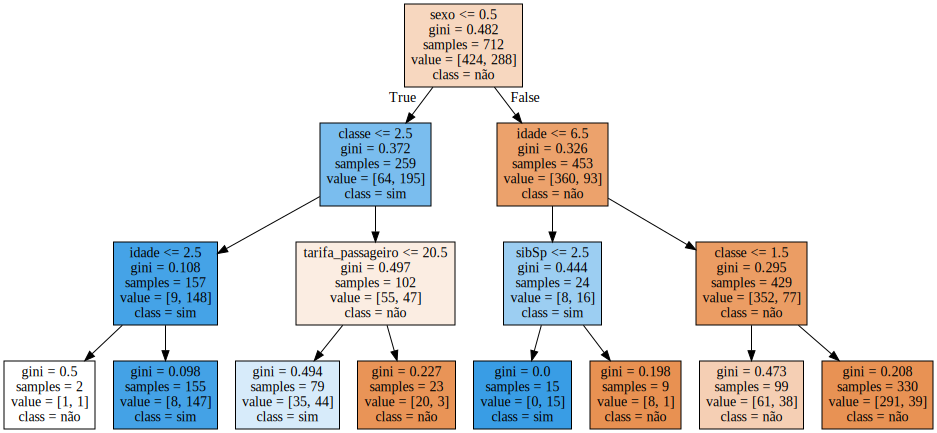

In [11]:
dot_data = export_graphviz(modelo_Decision_Tree, out_file=None, feature_names=train_x.columns, filled=True, class_names=['não', 'sim'])
grafico =graphviz.Source(dot_data)
grafico

In [12]:
# SVM

modelo_SVC = SVC(kernel='linear')
modelo_SVC.fit(train_x, train_y)
previsoes_SVC = modelo_SVC.predict(test_x)

acuracia_SVC = accuracy_score(test_y, previsoes_SVC) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_SVC)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 100.00%


In [13]:
# logistic Regression

modelo_Logistic_Regression = LogisticRegression()
modelo_Logistic_Regression.fit(train_x, train_y)
previsoes_Logistic_Regression = modelo_Logistic_Regression.predict(test_x)

acuracia_Logistic_Regression = accuracy_score(test_y, previsoes_Logistic_Regression) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_Logistic_Regression)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 90.63%


In [14]:
# Random Forest Classifiern

modelo_Random_Forest_Classifiern = RandomForestClassifier()
modelo_Random_Forest_Classifiern.fit(train_x, train_y)
previsoes_Random_Forest_Classifiern = modelo_Random_Forest_Classifiern.predict(test_x)

acuracia_Random_Forest_Classifiern = accuracy_score(test_y, previsoes_Random_Forest_Classifiern) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_Random_Forest_Classifiern)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 80.36%


In [15]:
# KneighborsClassifier

modelo_Random_KNeighborsClassifier = KNeighborsClassifier( n_neighbors=3)
modelo_Random_KNeighborsClassifier.fit(train_x, train_y)
previsoes_KNeighborsClassifier = modelo_Random_KNeighborsClassifier.predict(test_x)

acuracia_Random_KNeighborsClassifier = accuracy_score(test_y, previsoes_KNeighborsClassifier) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_Random_KNeighborsClassifier)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 61.03%


In [16]:
# KMeans

modelo_KMeans = KMeans(n_clusters=2, n_init=2)
modelo_KMeans.fit(train_x, train_y)
previsoes_KMeans = modelo_KMeans.predict(test_x)

acuracia_KMeans = accuracy_score(test_y, previsoes_KMeans) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))
print("A acurácia foi %.2f%%" % acuracia_KMeans)

Treinaremos com 712 elementos e testaremos com 331 elementos
A acurácia foi 63.14%
